# n-qubit circuit depth and #gates

Óscar Amaro April 2021

UnitaryFund project

In this notebook we show how the circuit size ($\propto n^2$) and depth ($\propto n$) scale with the number of qubits in the qiskit QFT algorithm
The best algorithm to date implements QFT with complexity $\propto n \ \log n$

https://en.wikipedia.org/wiki/Quantum_Fourier_transform

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.circuit.library import QFT

We can build very large circuits (#qubits >> 30) because we are not actually simulating them.

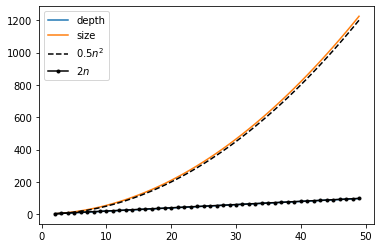

In [38]:
nqubits_lst = np.arange(2,50)
size_lst = nqubits_lst*0
depth_lst = nqubits_lst*0

for i in range(len(nqubits_lst)):
    nqubits = nqubits_lst[i]
    qc = QuantumCircuit(nqubits)
    qc += QFT(num_qubits=nqubits, approximation_degree=0, do_swaps=False, inverse=False, insert_barriers=False, name='qft')
    size_lst[i] = qc.size()
    depth_lst[i] = qc.depth()
#qc.draw('mpl')

# plot
plt.plot(nqubits_lst, depth_lst, label='depth')
plt.plot(nqubits_lst, size_lst, label='size')
plt.plot(nqubits_lst, 0.5*nqubits_lst**2, 'k--', label=r'$0.5 n^2$')
plt.plot(nqubits_lst, 2*nqubits_lst, 'k.-', label=r'$2n$')
plt.legend()
plt.show()